<a href="https://colab.research.google.com/github/stemarzo/DISME/blob/main/02_Secondo_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# SECONDO ASSIGNMENT: IMAGE MANAGEMENT

In [ ]:
import numpy as np
from matplotlib import pyplot as plt

# Image management
from skimage import io # Input/output
from skimage import transform # Geometric transformations (e.g. resize)
from skimage import filters # Local processing
from skimage import color # Change of color space

# Set visualization size for figures (notebook only)
plt.rcParams['figure.figsize'] = [15,5] # width, height

##Esercitazione

### Visualizzare un'immagine

In [ ]:
im = io.imread('images/redpanda.png')

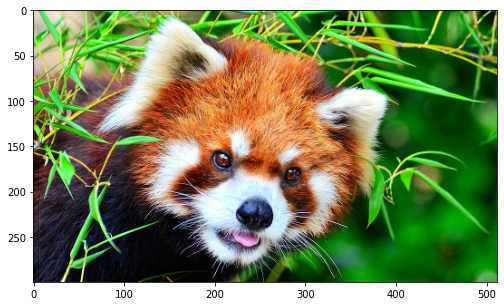

In [ ]:
plt.imshow(im); plt.show()

In [ ]:
type(im)

numpy.ndarray

In [ ]:
im.shape 

(300, 512, 4)

la quarta dimensione è l'alfa channel che codifica l'opacità, ovvero se ho opacità massima lo mostro con la codifica RGB, se l'opacità è zero non devo mostrare il pixel.

### Guardiamo un canale alla volta

Permette di vedere valori bassi con il colore nero, mentre valori alti con il colore bianco

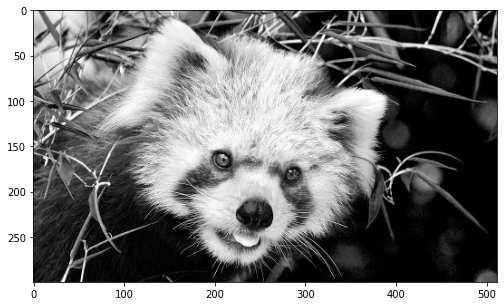

In [ ]:
plt.imshow(im[:,:,0], cmap='gray')

Text(0.5, 1.0, 'Blue')

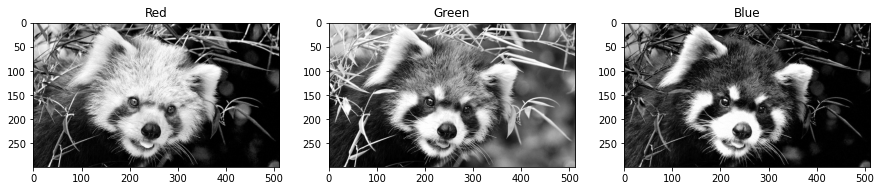

In [ ]:
plt.subplot(1,3,1); plt.imshow(im[:,:,0], cmap='gray'); plt.title('Red')
plt.subplot(1,3,2); plt.imshow(im[:,:,1], cmap='gray'); plt.title('Green')
plt.subplot(1,3,3); plt.imshow(im[:,:,2], cmap='gray'); plt.title('Blue')

### Immagine a scala di grigi

In [ ]:
im  = io.imread('images/redpanda.png', as_gray=True)

In [ ]:
im[0,0]

0.8435984313725491

In [ ]:
im.shape

(300, 512)

Text(0.5, 1.0, 'Grayscale')

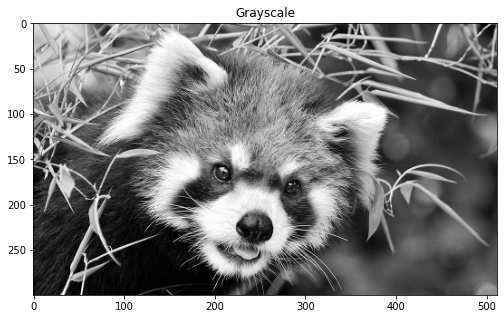

In [ ]:
plt.imshow(im, cmap='gray'); plt.clim(0,1); plt.title('Grayscale')

plt.clim() serve per non effettuare uno stretching e diciamo che 0 deve essere mappato a nero e 1 deve essere mappato a bianco. 

Serve per non introdurre bias nella visulaizzazione.

### Immagine Church

In [ ]:
im_church  = io.imread('images/church.jpg', as_gray=True)

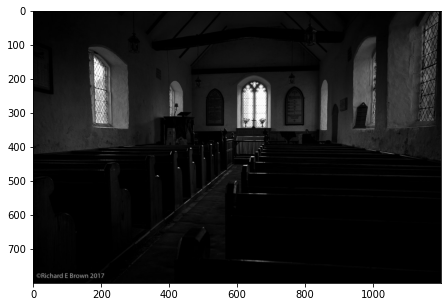

In [ ]:
plt.imshow(im_church, cmap='gray'); plt.clim(0,1); plt.show()

Applicare una gamma correction per schiarire l'immagine

Text(0.5, 1.0, 'Grayscale')

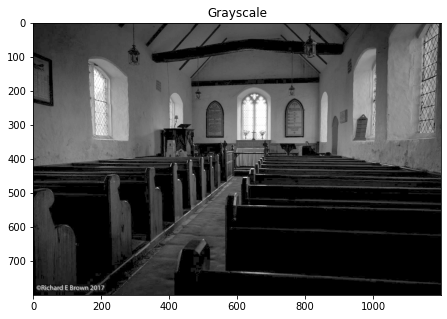

In [ ]:
plt.imshow(im_church**0.4, cmap='gray'); plt.clim(0,1); plt.title('Grayscale')

Altri tipi di manipolazione (rescaling)

In [ ]:
im_church.shape

(800, 1200)

In [ ]:
new_shape = (int(im_church.shape[0]*0.2), int(im_church.shape[1]*0.2))

calcoliamo la dimensione del 20% dell'img

In [ ]:
new_shape

(160, 240)

In [ ]:
im_small = transform.resize(im_church, new_shape)

con questo faccio il resize

In [ ]:
im_small.shape

(160, 240)

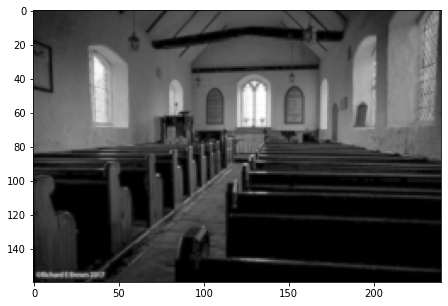

In [ ]:
plt.imshow(im_small**0.4, cmap='gray'); plt.clim(0,1); plt.show()

Altri tipi di manipolazione, applicare un'immagine sopra l'altra in una posizione scelta.

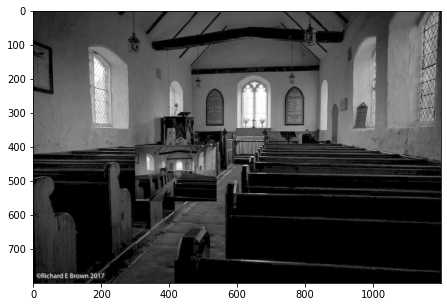

In [ ]:
im_over = im_church.copy() #senza copy sarebbe solo un riferimento
im_over[400:400+im_small.shape[0], 300:300+im_small.shape[1]] = im_small
plt.imshow(im_over**0.4, cmap="gray")

Manipolazione locale: Filtering

In [ ]:
im_church = im_church **0.5;

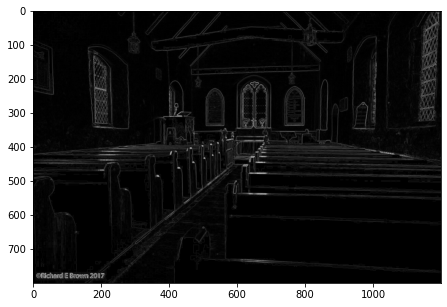

In [ ]:
im_edge = filters.sobel(im_church)
plt.imshow(im_edge, cmap="gray")

valori vicini a 1 dove c'era un forte cambio di luminosità, mentre valroi bassi in tutte le regioni in cui l'intorni del pixel ha valori omogenei

### Gestione colore

faccio la conversione da rgb a hsv

In [ ]:
im = io.imread('images/redpanda.png')
im_hsv = color.rgb2hsv(im[:,:,0:3])#ignora il canale 3

In [ ]:
im_hsv.shape

(300, 512, 3)

C'è qualcosa che non va, perchè noi non abbiamo più una codifica rgb, ma utilizziamo comunque quella.

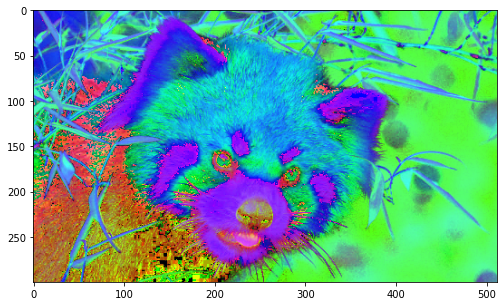

In [ ]:
plt.imshow(im_hsv)

Text(0.5, 1.0, 'value')

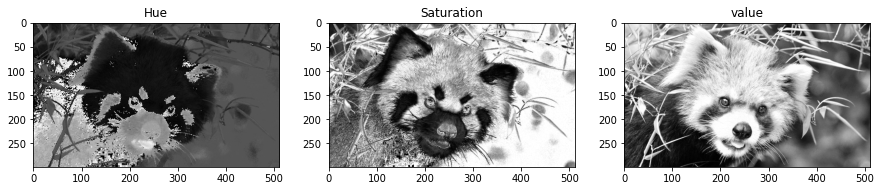

In [ ]:
plt.subplot(1,3,1); plt.imshow(im_hsv[:,:,0], cmap='gray'); plt.title('Hue')
plt.subplot(1,3,2); plt.imshow(im_hsv[:,:,1], cmap='gray'); plt.title('Saturation')
plt.subplot(1,3,3); plt.imshow(im_hsv[:,:,2], cmap='gray'); plt.title('value')

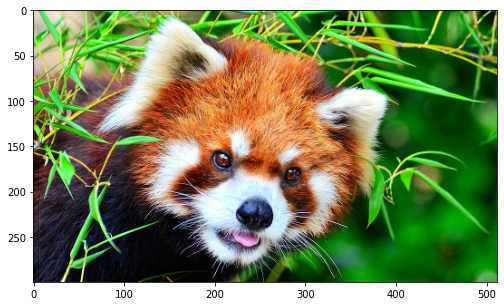

In [ ]:
plt.imshow(im)

## Assignment

1. immagine custom
2. convertire in YCbCr
3. Sfocare (filtro gaussiano) Cb e Cr
4. Visualizzare Y, Cb sfocato, Cr sfocato e ricostruire immagine in RGB derivante
5. Sfocare solo Y (Cb e Cr non sfocati)
6. Visualizzare Y sfocato Cb, Cr e ricostruire RGB
7. Sperimentare con diverse entità del filtro gaussiano.

In [ ]:
import numpy as np
from matplotlib import pyplot as plt

# Image management
from skimage import io # Input/output
from skimage import transform # Geometric transformations (e.g. resize)
from skimage import filters # Local processing
from skimage import color # Change of color space

# Set visualization size for figures (notebook only)
plt.rcParams['figure.figsize'] = [15,5] # width, height

### Immagine custom

In [ ]:
img_ass = io.imread('images/girl.jpg')

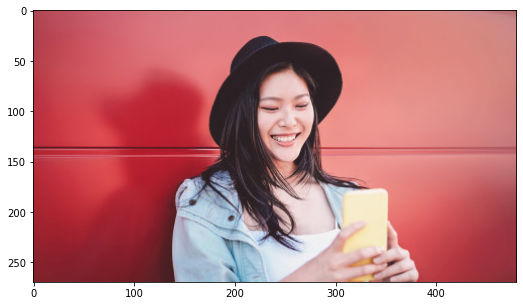

In [ ]:
plt.imshow(img_ass); plt.show()

### Conversione in yCbCr

In [ ]:
img_ycbcr = color.rgb2ycbcr(img_ass[:,:,0:3])

Text(0.5, 1.0, 'Cr')

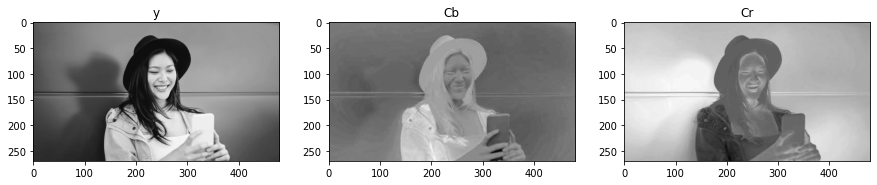

In [ ]:
plt.subplot(1,3,1); plt.imshow(img_ycbcr[:,:,0], cmap='gray'); plt.title('y')
plt.subplot(1,3,2); plt.imshow(img_ycbcr[:,:,1], cmap='gray'); plt.title('Cb')
plt.subplot(1,3,3); plt.imshow(img_ycbcr[:,:,2], cmap='gray'); plt.title('Cr')

### Blur su Cb e Cr

In [ ]:
img_blurCbCr = img_ycbcr.copy()

In [ ]:
img_blurCbCr[:,:,1]=filters.gaussian(img_blurCbCr[:,:,1], sigma=1)
img_blurCbCr[:,:,2]=filters.gaussian(img_blurCbCr[:,:,2], sigma=1)

Text(0.5, 1.0, 'Cr')

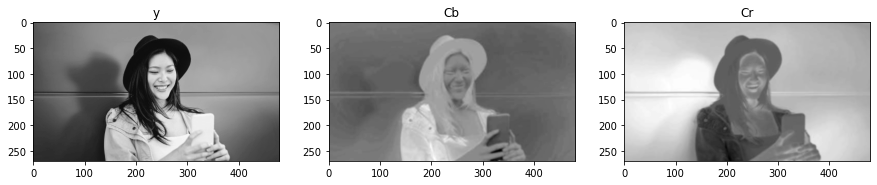

In [ ]:
plt.subplot(1,3,1); plt.imshow(img_blurCbCr[:,:,0], cmap='gray'); plt.title('y')
plt.subplot(1,3,2); plt.imshow(img_blurCbCr[:,:,1], cmap='gray'); plt.title('Cb')
plt.subplot(1,3,3); plt.imshow(img_blurCbCr[:,:,2], cmap='gray'); plt.title('Cr')

In [ ]:
img_blurCbCr_rgb = color.ycbcr2rgb(img_blurCbCr[:,:,0:3])

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


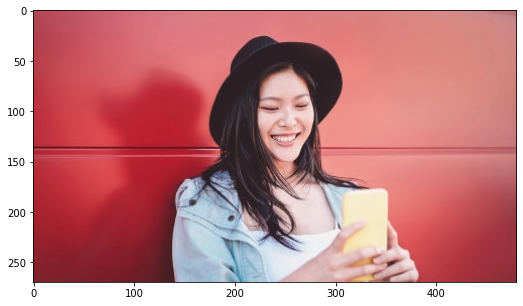

In [ ]:
plt.imshow(img_blurCbCr_rgb); plt.show()

### Blur y

In [ ]:
img_blury = img_ycbcr.copy()

In [ ]:
img_blury[:,:,0]=filters.gaussian(img_blury[:,:,0], sigma=1)

Text(0.5, 1.0, 'Cr')

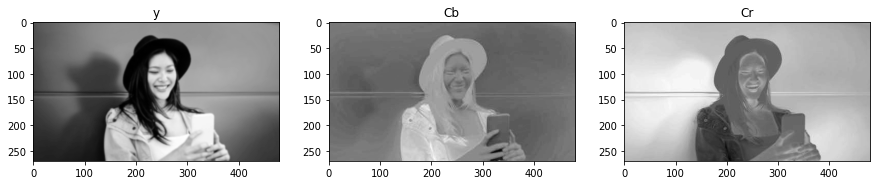

In [ ]:
plt.subplot(1,3,1); plt.imshow(img_blury[:,:,0], cmap='gray'); plt.title('y')
plt.subplot(1,3,2); plt.imshow(img_blury[:,:,1], cmap='gray'); plt.title('Cb')
plt.subplot(1,3,3); plt.imshow(img_blury[:,:,2], cmap='gray'); plt.title('Cr')

In [ ]:
img_blury_rgb = color.ycbcr2rgb(img_blury[:,:,0:3])

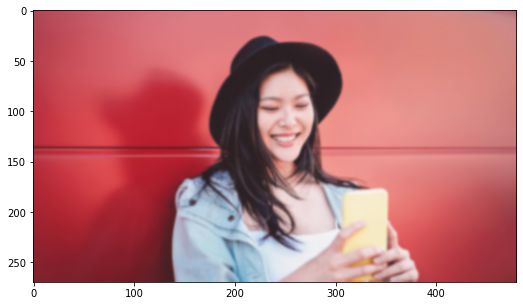

In [ ]:
plt.imshow(img_blury_rgb); plt.show()

### Sperimentare filtro gaussiano

In [ ]:
img_blurCbCr_10 = img_ycbcr.copy()
img_blury_10 = img_ycbcr.copy()

In [ ]:
img_blurCbCr_10[:,:,1]=filters.gaussian(img_blurCbCr_10[:,:,1], sigma=10)
img_blurCbCr_10[:,:,2]=filters.gaussian(img_blurCbCr_10[:,:,2], sigma=10)

In [ ]:
img_blury_10[:,:,0]=filters.gaussian(img_blury_10[:,:,0], sigma=10)

In [ ]:
img_blurCbCr_rgb_10 = color.ycbcr2rgb(img_blurCbCr_10[:,:,0:3])
img_blury_rgb_10 = color.ycbcr2rgb(img_blury_10[:,:,0:3])

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


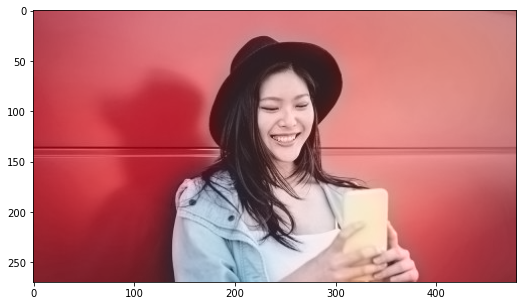

In [ ]:
plt.imshow(img_blurCbCr_rgb_10); plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


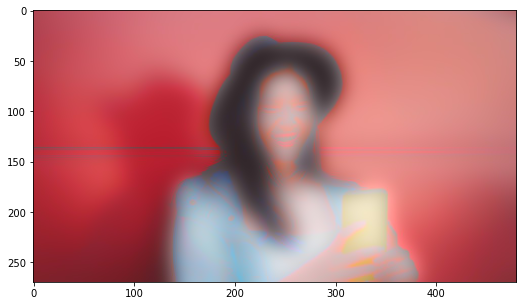

In [ ]:
plt.imshow(img_blury_rgb_10); plt.show()